# Multiple ways to implement Multiple Linear Regression (MLR) Modelling in Python.

This notebook aims to illustrate different ways in which one can implement Multiple Linear Regression in Python. To achieve this objective, I will be using a revised dataset created to predict the end semester examination marks. 

Here, I have added one more feature to make the task of predication a little bit interesting. I added a feature called HRS, which indicates the number of hours spent studying the course day before the examination. The values for the HRS vector are randomly generated in the range of 0 to 24, and they are not actual.

The notebook illustrates three different ways to implement MLR. These are:
1. Ordinary Least Square method through Matrix operation.
2. Ordinary Least Square method from StatsModels
3. Gradient Descent Method from Scikit-Learn

My YouTube videos on MLR using [OLS](https://www.youtube.com/watch?v=0qv9Ck24q1s) and [Gradient Descent algorithm](https://www.youtube.com/watch?v=Y1J22hk_Vf0) explain the theory behind these methods.

> The follwoing code segment imports required modules and loads dataset as Panda's Dataframe.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import math


The dataset has four different feature vectors called Attendance, MSE, HRS and ESE. The 'ESE' is an output vector, and the rest of the columns are input vectors representing independent variables.

In [2]:
df = pd.read_csv('../input/predictingese/amsPrediction - Sheet1.csv')
df.head()

,Attendance,MSE,HRS,ESE
0,70,10,17,42
1,92,7,20,39
2,67,3,18,32
3,82,16,13,50
4,80,9,10,44


In [3]:
df.describe()

,Attendance,MSE,HRS,ESE
count,73.000000,73.000000,73.000000,73.000000
mean,81.698630,9.780822,12.904110,46.630137
std,9.506847,3.047069,5.701278,6.617542
min,62.000000,3.000000,2.000000,32.000000
25%,75.000000,8.000000,8.000000,42.000000
50%,80.000000,10.000000,14.000000,47.000000
75%,90.000000,11.000000,18.000000,50.000000
max,98.000000,17.000000,22.000000,64.000000


The correlation analysis shows no strong correlation between the input vectors, namely 'Attendance'(-0.10), 'HRS'(0.25) and output vector 'ESE'.

In [4]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Attendance,MSE,HRS,ESE
Attendance,1.000000,-0.080943,-0.165307,-0.109972
MSE,-0.080943,1.000000,0.177060,0.751530
HRS,-0.165307,0.177060,1.000000,0.255632
ESE,-0.109972,0.751530,0.255632,1.000000


The following code segment separates input and output vectors. Also, it adds a constant unit vector as a coefficient for *beta0* or *intercept*.

In [5]:
endog = df['ESE']
exog = sm.add_constant(df[['MSE','Attendance','HRS']])
print(exog)

    const  MSE  Attendance  HRS
0     1.0   10          70   17
1     1.0    7          92   20
2     1.0    3          67   18
3     1.0   16          82   13
4     1.0    9          80   10
..    ...  ...         ...  ...
68    1.0   10          80   19
69    1.0    8          78   18
70    1.0    9          92    8
71    1.0   11          78    6
72    1.0   12          78   20

[73 rows x 4 columns]


The follwing code converts the input and output vectors as numpy array in order to implement the  formula in a stepwise manner.



It also transpose the input vector.

In [6]:
X=exog.to_numpy()
Y= endog.to_numpy()
s1_xt =np.transpose(X)
print(s1_xt)


[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.]
 [10.  7.  3. 16.  9. 11.  7. 10.  8.  8.  8. 12.  4.  7. 15. 12.  6.  9.
  10.  7. 13.  5.  8. 12. 17. 11. 10. 16. 17. 12. 11. 13. 11. 10.  7.  6.
   9.  9. 12. 11.  6.  7. 14. 12. 10. 14.  5.  6. 11.  9.  9.  8.  9.  6.
  10. 17. 11. 11. 10.  8.  7.  7. 10. 11.  7. 12.  8. 10. 10.  8.  9. 11.
  12.]
 [70. 92. 67. 82. 80. 72. 85. 75. 80. 70. 85. 65. 70. 75. 80. 85. 75. 68.
  65. 95. 90. 78. 78. 80. 85. 95. 78. 79. 65. 98. 98. 68. 88. 75. 88. 88.
  88. 90. 75. 98. 95. 98. 78. 95. 75. 77. 85. 70. 95. 95. 75. 90. 90. 96.
  94. 80. 75. 78. 82. 80. 80. 92. 85. 68. 88. 80. 62. 82. 80. 78. 92. 78.
  78.]
 [17. 20. 18. 13. 10. 16. 18. 14. 14. 14. 16. 17. 17. 19. 20. 19. 15. 22.
  19. 20. 12.  8.

In [7]:
s2_mul1= np.matmul(s1_xt,X)
print(s2_mul1)

[[7.30000e+01 7.14000e+02 5.96400e+03 9.42000e+02]
 [7.14000e+02 7.65200e+03 5.81640e+04 9.43500e+03]
 [5.96400e+03 5.81640e+04 4.93758e+05 7.63150e+04]
 [9.42000e+02 9.43500e+03 7.63150e+04 1.44960e+04]]


In [8]:
s3_inv=np.linalg.inv(s2_mul1)
print(s3_inv)

[[ 1.38842078e+00 -1.55046712e-02 -1.37334738e-02 -7.83221221e-03]
 [-1.55046712e-02  1.54870518e-03  2.63702672e-05 -1.39285323e-04]
 [-1.37334738e-02  2.63702672e-05  1.58438230e-04  4.11779368e-05]
 [-7.83221221e-03 -1.39285323e-04  4.11779368e-05  4.51821652e-04]]


In [9]:
s4_mul= np.matmul(s3_inv,s1_xt)
print(s4_mul)

[[ 1.38883294e-01 -1.40235753e-01  2.80784202e-01 -8.76175706e-02
   7.18787124e-02  1.03743887e-01 -2.84370119e-02  9.37125614e-02
   5.60545348e-02  1.93389273e-01 -2.82772588e-02  1.76541321e-01
   2.31911321e-01  1.01065514e-01 -9.94714372e-02 -1.13792580e-01
   1.47899034e-01  1.42693852e-01  1.91886239e-01 -1.81436175e-01
  -1.43139135e-01  1.77028769e-01  1.77508029e-01  8.80223963e-02
  -1.99148149e-01 -1.80797162e-01  1.23002050e-01 -1.01242635e-01
   1.22514601e-01 -2.29670042e-01 -1.98500947e-01  1.43332864e-01
  -1.00327270e-01  1.17209198e-01  4.78457497e-02  5.55182088e-02
  -1.44924416e-02 -8.89526625e-02  7.05354311e-02 -2.84655281e-01
  -4.84483202e-02 -9.73212007e-02  3.74867282e-02 -1.49308560e-01
   1.64202471e-01  7.47168387e-02  8.08944526e-02  2.63559677e-01
  -2.43454860e-01 -1.18458971e-01  1.64042718e-01 -3.42869302e-02
  -1.43778148e-01 -1.17007279e-01 -1.59391229e-01 -1.14816355e-01
   1.40865588e-01 -9.98580456e-03 -5.72472408e-02  1.10880020e-01
   8.72236

In [10]:
s5_res =np.matmul(s4_mul,Y)
print(s5_res)

[ 3.11156436e+01  1.57990739e+00 -2.15574027e-02  1.41265918e-01]


The following code segment build the MLR model using  the OLS method from the statsmodel. 

In [11]:
mod = sm.OLS(endog, exog)
results = mod.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                    ESE   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     31.92
Date:                Fri, 09 Oct 2020   Prob (F-statistic):           4.68e-13
Time:                        14:14:18   Log-Likelihood:                -209.26
No. Observations:                  73   AIC:                             426.5
Df Residuals:                      69   BIC:                             435.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.1156      5.154      6.037      0.0

In [12]:
def RSE(y_true, y_predicted):
   
    y_true = np.array(y_true)
    y_predicted = np.array(y_predicted)
    RSS = np.sum(np.square(y_true - y_predicted))

    rse = math.sqrt(RSS / (len(y_true) - 2))
    return rse

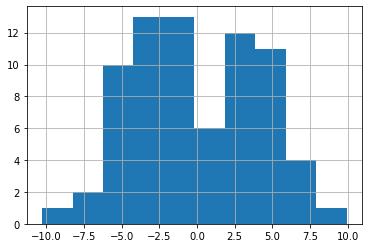

In [13]:
yp= results.predict()
ypa = np.array(yp)
yta = df['ESE']
eterms =yta-ypa


df1 = pd.DataFrame(eterms)
df1['ESE'].hist(bins=10)






In [14]:
rse= RSE(df['ESE'],results.predict())
print(rse)

4.312395731438574


The following code segment builds the MLR model from Scikit-Learn module.

In [15]:
from sklearn import linear_model
X = df[['MSE','Attendance','HRS']]
y = df['ESE']

lm = linear_model.LinearRegression()
model = lm.fit(X,y)
lm.coef_

array([ 1.57990739, -0.0215574 ,  0.14126592])

In [16]:
lm.intercept_

31.115643575666333